In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

## **Data Extraction and Visualisation**

In [177]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [179]:
df['Sleep Duration'].fillna('Others', inplace=True)

<Axes: xlabel='Sleep Duration', ylabel='count'>

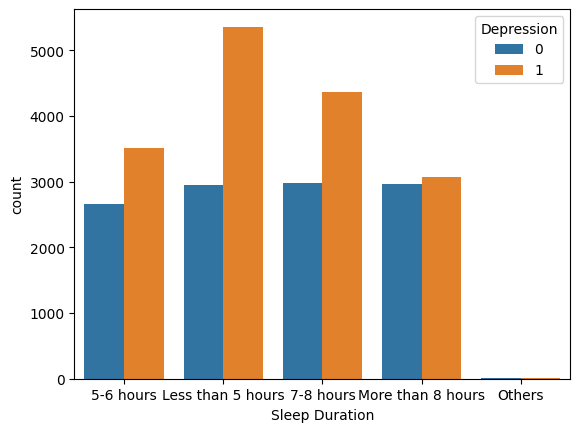

In [180]:
#pie chart for sleep duration and depreesion vale = 1
sns.countplot(x='Sleep Duration', hue='Depression', data=df)

In [181]:
print("According to above graph, people taking Less than 5 hours of sleep have higher chances of depression")

According to above graph, people taking Less than 5 hours of sleep have higher chances of depression


<Axes: xlabel='Study Satisfaction', ylabel='count'>

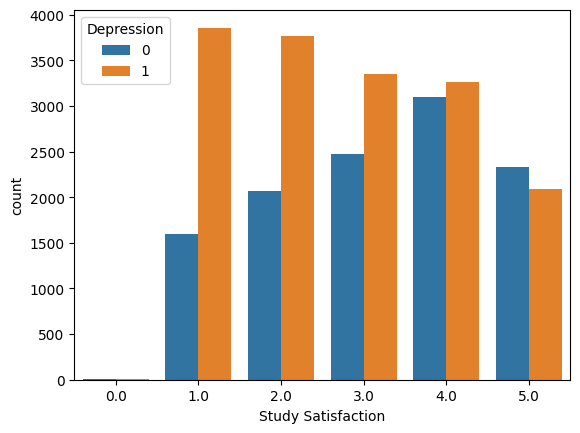

In [182]:
#study satisfaction and depression
sns.countplot(x='Study Satisfaction', hue='Depression', data=df)

In [183]:
#average of satisfaction points having depression
study_sat = df[df['Depression']==1]['Study Satisfaction'].mean().astype(int)
print('Average score of study satisfaction for students having depression is: ', study_sat)

Average score of study satisfaction for students having depression is:  2


<Axes: xlabel='Job Satisfaction', ylabel='count'>

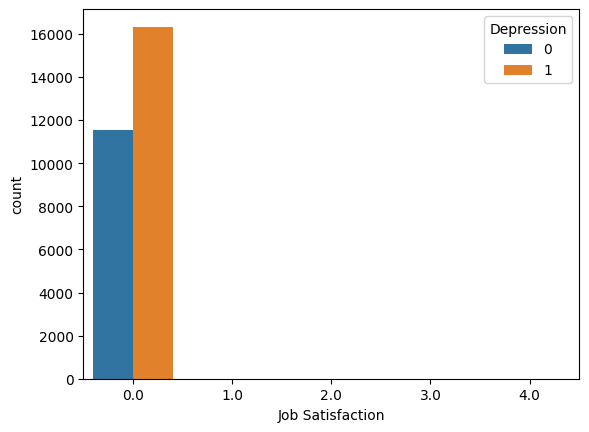

In [184]:
#job satisfaction and depression
sns.countplot(x='Job Satisfaction', hue='Depression', data=df)

<Axes: xlabel='Academic Pressure', ylabel='count'>

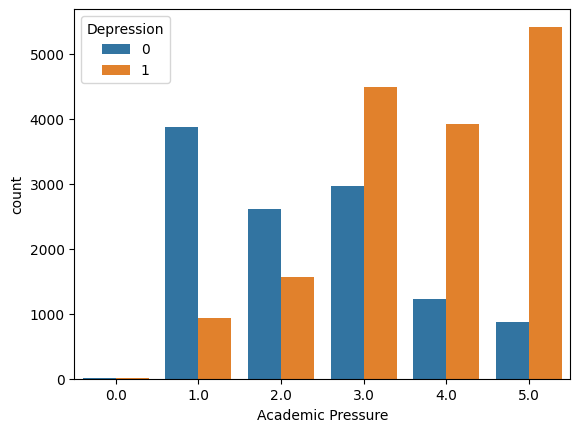

In [185]:
#academic pressure and depression
sns.countplot(x='Academic Pressure', hue='Depression', data=df)

In [186]:
#average academic pressure score and depression
academic_pressure = df[df['Depression']==1]['Academic Pressure'].mean().astype(int)
print('Average score of academic pressure for students having depression is: ', academic_pressure)

Average score of academic pressure for students having depression is:  3


<Axes: xlabel='Work Pressure', ylabel='count'>

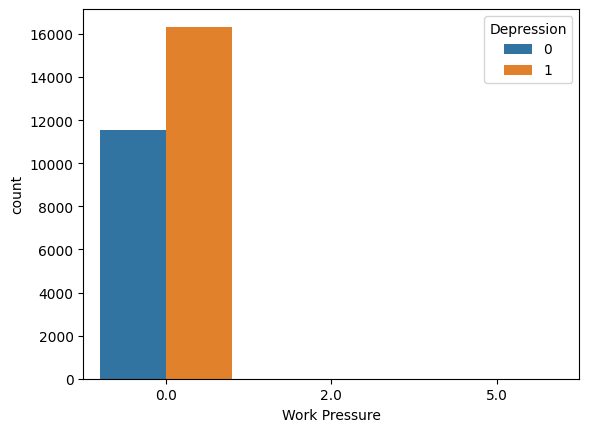

In [187]:
#work pressure and depression
sns.countplot(x='Work Pressure', hue='Depression', data=df)

<Axes: xlabel='Gender', ylabel='count'>

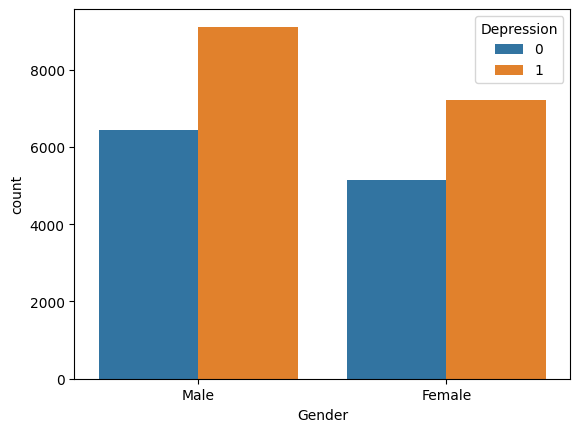

In [188]:
#gender and depression
sns.countplot(x='Gender', hue='Depression', data=df)

In [189]:
#GEnder having more depression
gender = df[df['Depression']==1]['Gender'].value_counts()
if gender[1]>gender[0]:
  print('Female have more depression')
else:
  print('Male have more depression')

Male have more depression


<Axes: xlabel='CGPA', ylabel='Depression'>

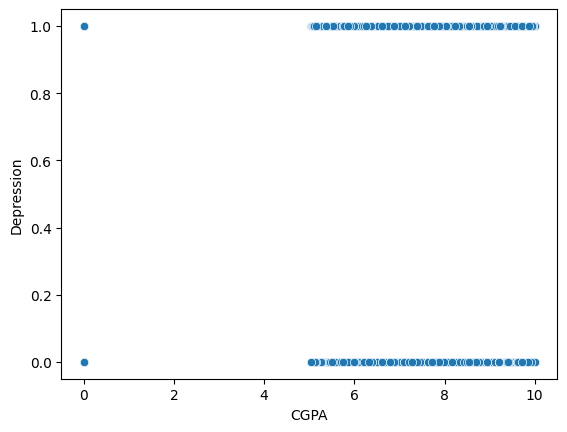

In [190]:
# cgpa and depression
sns.scatterplot(x='CGPA', y='Depression', data=df)

In [191]:
#average cgpa and depression
cgpa = df[df['Depression']==1]['CGPA'].mean().astype(int)
print('Average CGPA of students having depression is: ', cgpa)

Average CGPA of students having depression is:  7


<Axes: xlabel='Dietary Habits', ylabel='count'>

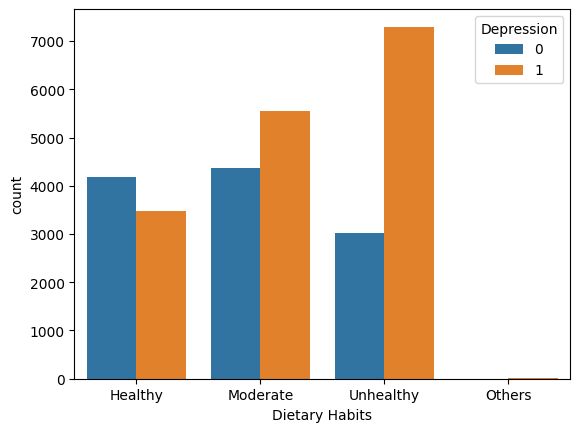

In [192]:
#dietry habits and depression
sns.countplot(x='Dietary Habits', hue='Depression', data=df)

In [193]:
#effect of dietry habits and depression
dh = df[df['Depression'] == 1]['Dietary Habits'].value_counts()
unhealthy_count = dh.get('Unhealthy', 0)
healthy_count = dh.get('Healthy', 0)

if unhealthy_count > healthy_count:
  print('Unhealthy have more depression')
else:
  print('Healthy have more depression')

Unhealthy have more depression


<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

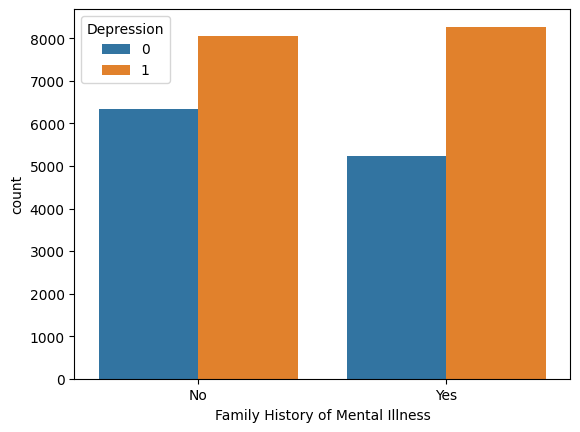

In [194]:
#Family History of Mental Illness and depression
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df)

In [195]:
#howfamily history of mental history causes depression
mh = df[df['Depression'] == 1]['Family History of Mental Illness'].value_counts()
mh_yes = mh.get('Yes', 0)
mh_no = mh.get('No', 0)

if mh_yes > mh_no:
  print('People having family history of mental illness have more chances of having depression')
else:
  print('People having family history of mental illness have more chances of having depression')

People having family history of mental illness have more chances of having depression


<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

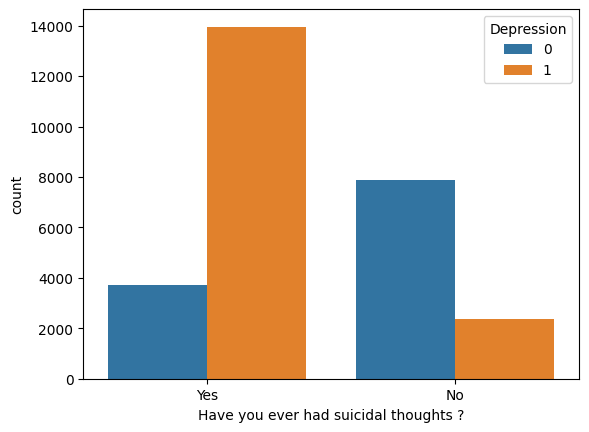

In [196]:
#graph between suicidal thoughts and Depression
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)

In [197]:
#Suicidal thoughts and depression
st = df[df['Depression'] == 1]['Have you ever had suicidal thoughts ?'].value_counts()
st_yes = st.get('Yes', 0)
st_no = st.get('No', 0)

if st_yes > st_no:
  print('People having suicidal thoughts have chances of having depression')
else:
  print('People having no suicidal thoughts have less chances of having depression')

People having suicidal thoughts have chances of having depression


<Axes: xlabel='Work/Study Hours', ylabel='count'>

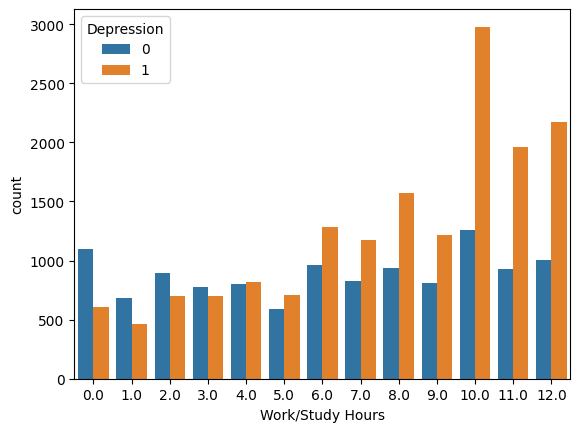

In [198]:
#work/study hours and depression
sns.countplot(x='Work/Study Hours', hue='Depression', data=df)

In [199]:
#work/study hour effect on depression
sh = df[df['Depression']==1]['Work/Study Hours'].mean().astype(int)
print('Average work/study hours of people having depression is', sh, 'hours')

Average work/study hours of people having depression is 7 hours


## **Let's clean the data and start training**

In [200]:
encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['Depression'])
df.head(1)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,result
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1


In [285]:
# Assuming 'df' is your DataFrame and 'result' is the target column
target = df['result']
features = df.drop(columns=['Depression', 'result']) # Exclude target and original 'Depression'

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features, drop_first=True)


In [286]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

### **GaussianNB**

In [287]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [288]:
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [289]:
predgb = gb.predict(x_test)

In [318]:
# Assuming sample_input_encoded is already created as in the previous steps

# Predict using the Gaussian Naive Bayes model
prediction_gb = gb.predict(sample_input_encoded)

# Convert prediction to words
if prediction_gb[0] == 1:
    prediction_word_gb = "Depressed"
else:
    prediction_word_gb = "Not Depressed"

print(f"Gaussian Naive Bayes Prediction: {prediction_word_gb}")

Gaussian Naive Bayes Prediction: Not Depressed


In [290]:
accuracy_score(y_test, predgb)
cm = confusion_matrix(y_test, predgb)
print("Accuracy score of the model: ", accuracy_score(y_test, predgb))
print("Confusion Matrix: \n", cm)

Accuracy score of the model:  0.7905393298691991
Confusion Matrix: 
 [[1523  820]
 [ 349 2889]]


Text(0.5, 1.0, 'Confusion Matrix')

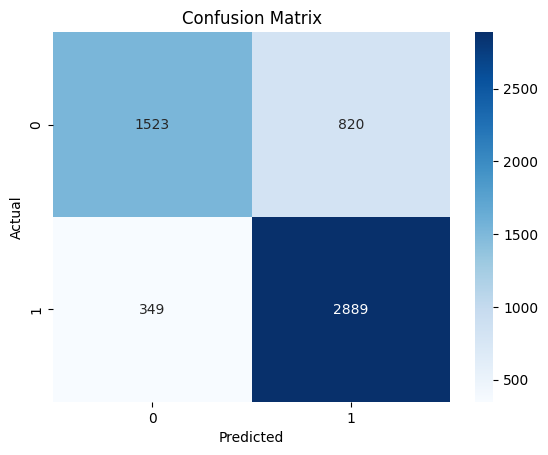

In [291]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### **Random Forest Classifier**

In [292]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=3, min_samples_split=10, min_samples_leaf=5)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=30)

In [293]:
predrf = rfc.predict(x_test)


In [294]:
accuracy_score(y_test, predrf)
cm = confusion_matrix(y_test, predrf)
print("Accuracy score of the model: ", accuracy_score(y_test, predrf))
print("Confusion Matrix: \n", cm)

Accuracy score of the model:  0.7459236695932628
Confusion Matrix: 
 [[1019 1324]
 [  94 3144]]


Text(0.5, 1.0, 'Confusion Matrix')

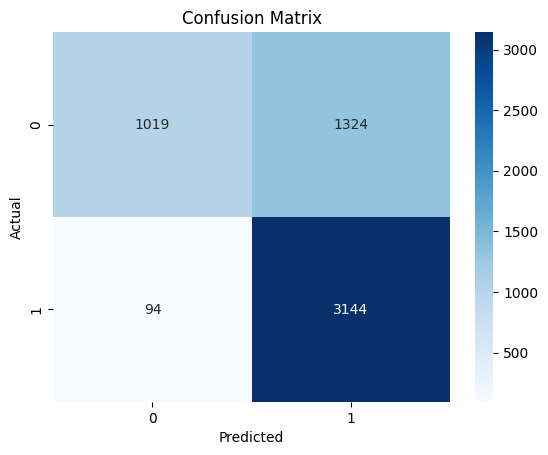

In [295]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [298]:
sequential = keras.Sequential([keras.layers.Dense(66, activation = 'relu', input_shape = (x_train.shape[1],)),
                               keras.layers.Dense(6, activation='relu'),
                               keras.layers.Dense(1, activation='sigmoid')])
sequential_compile = sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [299]:
sequential.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 66)             │         7,326 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,735 (30.21 KB)

 Trainable params: 7,735 (30.21 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
res = sequential.fit(x_train, y_train, epochs=100)

Epoch 1/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8225 - loss: 0.4363
Epoch 2/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8519 - loss: 0.3469
Epoch 3/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8532 - loss: 0.3384
Epoch 4/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3326
Epoch 5/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3283
Epoch 6/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.3346
Epoch 7/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3233
Epoch 8/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8617 - loss: 0.3284
Epoch 9/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 0.3266
Epoch 10/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8602 - loss: 0.3243
Epoch 11/100
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3113
Epoch 12/100
698/698 ━━━━━━━━━━━━━━━━━━━━

(0.0, 1.0)

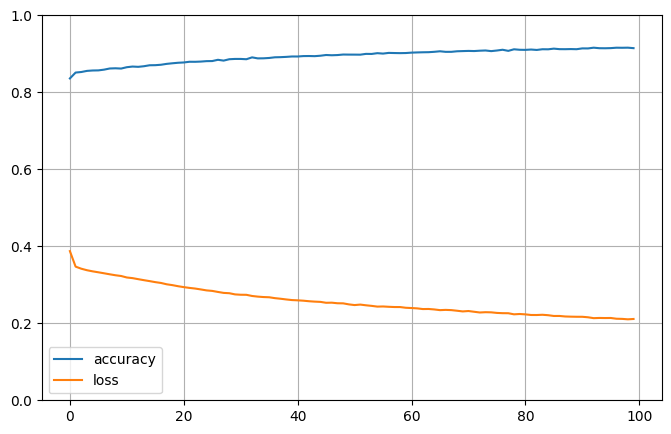

In [328]:
pd.DataFrame(res.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [329]:
sequential.evaluate(x_test, y_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.7149


[0.7101735472679138, 0.8030818700790405]

In [330]:
pred = sequential.predict(x_test)
pred_binary = (pred>0.5).astype(int)
report = classification_report(y_test, pred_binary)
print(report)

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2343
           1       0.82      0.85      0.83      3238

    accuracy                           0.80      5581
   macro avg       0.80      0.79      0.80      5581
weighted avg       0.80      0.80      0.80      5581



Text(0.5, 1.0, 'Confusion Matrix')

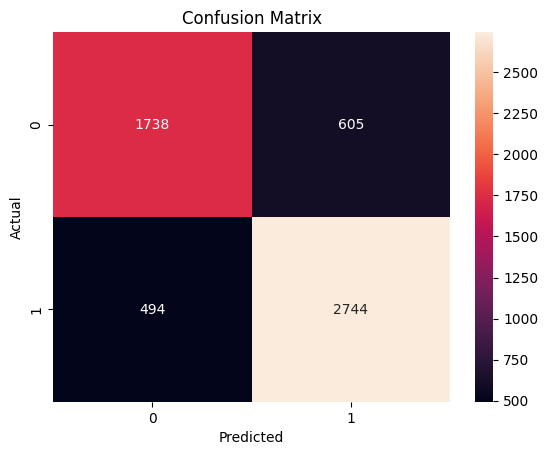

In [331]:
sm = confusion_matrix(y_test, pred_binary)
sns.heatmap(sm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [332]:
sample_input = pd.DataFrame({
    'Profession': ['Student'],
    'Gender': ['Male'],
    'Sleep Duration': ['Less than 5 hours'],
    'Study Satisfaction': ['Average'],
    'Job Satisfaction': ['Average'],
    'Academic Pressure': ['High'],
    'Work Pressure': ['High'],
    'Dietary Habits': ['Unhealthy'],
    'Family History of Mental Illness': ['Yes'],
    'Have you ever had suicidal thoughts ?': ['Yes'],
    'Work/Study Hours': ['More than 8 hours'],
    'CGPA': [3]
})

In [339]:
sample_input_encoded = pd.get_dummies(sample_input,
                                      columns=['Profession', 'Gender', 'Sleep Duration',
                                               'Study Satisfaction', 'Job Satisfaction',
                                               'Academic Pressure', 'Work Pressure',
                                               'Dietary Habits', 'Family History of Mental Illness',
                                               'Have you ever had suicidal thoughts ?',
                                               'Work/Study Hours', 'CGPA'],
                                      drop_first=True)
all_categories = {}
for col in categorical_columns:
    all_categories[col] = features.columns[features.columns.str.startswith(col)].tolist() #Get all unique values from features
# One-hot encode sample input, ensuring all possible categories are included and filled with 0
sample_input_encoded = pd.get_dummies(sample_input, columns=categorical_columns, drop_first=True)

# Reindex the sample_input_encoded DataFrame to match the columns of features
# Use 'features.columns' for ordering and fill missing columns with 0
sample_input_encoded = sample_input_encoded.reindex(columns=features.columns, fill_value=0)

# Now you can predict
predict = sequential.predict(sample_input_encoded)
prediction_binary = (predict > 0.5).astype(int)

# Convert binary prediction to words
if prediction_binary[0][0] == 1:
    prediction_word = "Depressed"
else:
    prediction_word = "Not Depressed"

print(f"Prediction: {prediction_word}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Depressed
